## Final Project

## Name: [Junhui Huang]

## Link to your the github repo: [https://github.com/huang-0505/data1030-project]


In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("MBTI.csv")
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


In [5]:
from sklearn.model_selection import train_test_split

# Assuming 'Personality' is the column that you want to stratify by
X = df.drop(columns=['Personality'])  # Features
y = df['Personality']  # Target (Personality types)

# Perform stratified sampling to pick 10% of the data
# X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.9, stratify=y, random_state=42)

# # Combine the sampled features and target back into a dataframe
# df_shrink = X_sample.copy()
# df_shrink['Personality'] = y_sample

# # Check the sampled data
# df_shrink.head()

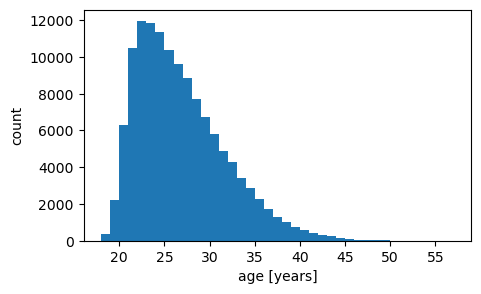

In [5]:
plt.figure(figsize=(5,3))

df['Age'].plot.hist(bins = df['Age'].nunique())   # bins = int(np.sqrt(df.shape[0])) 
                        # bins = df['age'].nunique()
plt.xlabel('age [years]')
plt.ylabel('count')
plt.show()

<Figure size 1200x700 with 0 Axes>

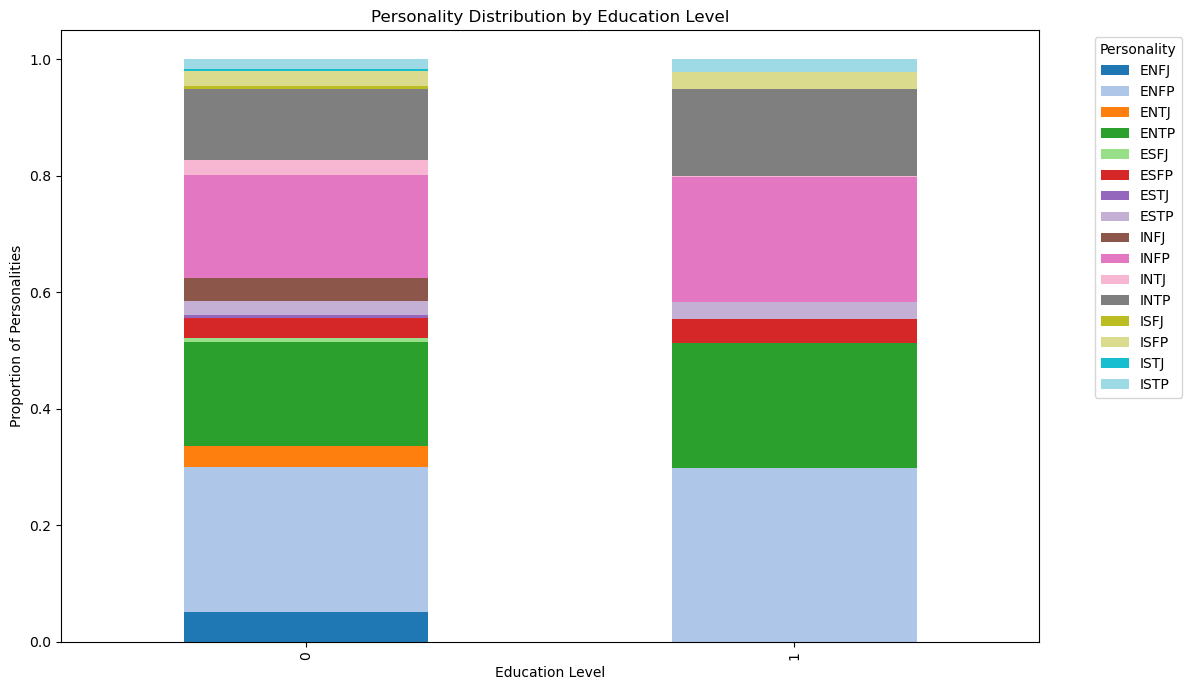

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Cross-tabulation of Education and Personality
edu_personality_ct = pd.crosstab(df['Education'], df['Personality'])

# Normalize the cross-tab to get proportions within each education level
edu_personality_ct_normalized = edu_personality_ct.div(edu_personality_ct.sum(axis=1), axis=0)

# Set the figure size larger for better readability
plt.figure(figsize=(12, 7))

# Plotting the normalized cross-tab as a stacked bar chart with distinct color map
edu_personality_ct_normalized.plot(kind='bar', stacked=True, figsize=(12, 7), colormap="tab20")

plt.title('Personality Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Personalities')
plt.legend(title='Personality', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [7]:
from scipy.stats import chi2_contingency

# Chi-Square test to assess the relationship between Education and Personality
chi2_stat, p, dof, expected = chi2_contingency(edu_personality_ct)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p}")


Chi-Square Statistic: 10128.80949453287
P-Value: 0.0


In [8]:
print("data shape is",df.shape)

pd.set_option('display.max_rows', None)
print(df.dtypes)

data shape is (128061, 9)
Age                   float64
Gender                 object
Education               int64
Introversion Score    float64
Sensing Score         float64
Thinking Score        float64
Judging Score         float64
Interest               object
Personality            object
dtype: object


In [9]:
print(df["Personality"].describe())

count     128061
unique        16
top         ENFP
freq       34404
Name: Personality, dtype: object


In [10]:
import numpy as np

# Count unique classes and their occurrences
classes, counts = np.unique(df["Personality"], return_counts=True)
for cls, count in zip(classes, counts):
    print(f"Class {cls}: {count} ({(count / len(y)) * 100:.2f}%)")


Class ENFJ: 3883 (3.03%)
Class ENFP: 34404 (26.87%)
Class ENTJ: 2783 (2.17%)
Class ENTP: 24718 (19.30%)
Class ESFJ: 554 (0.43%)
Class ESFP: 4832 (3.77%)
Class ESTJ: 392 (0.31%)
Class ESTP: 3334 (2.60%)
Class INFJ: 2919 (2.28%)
Class INFP: 24711 (19.30%)
Class INTJ: 1920 (1.50%)
Class INTP: 17132 (13.38%)
Class ISFJ: 371 (0.29%)
Class ISFP: 3456 (2.70%)
Class ISTJ: 262 (0.20%)
Class ISTP: 2390 (1.87%)


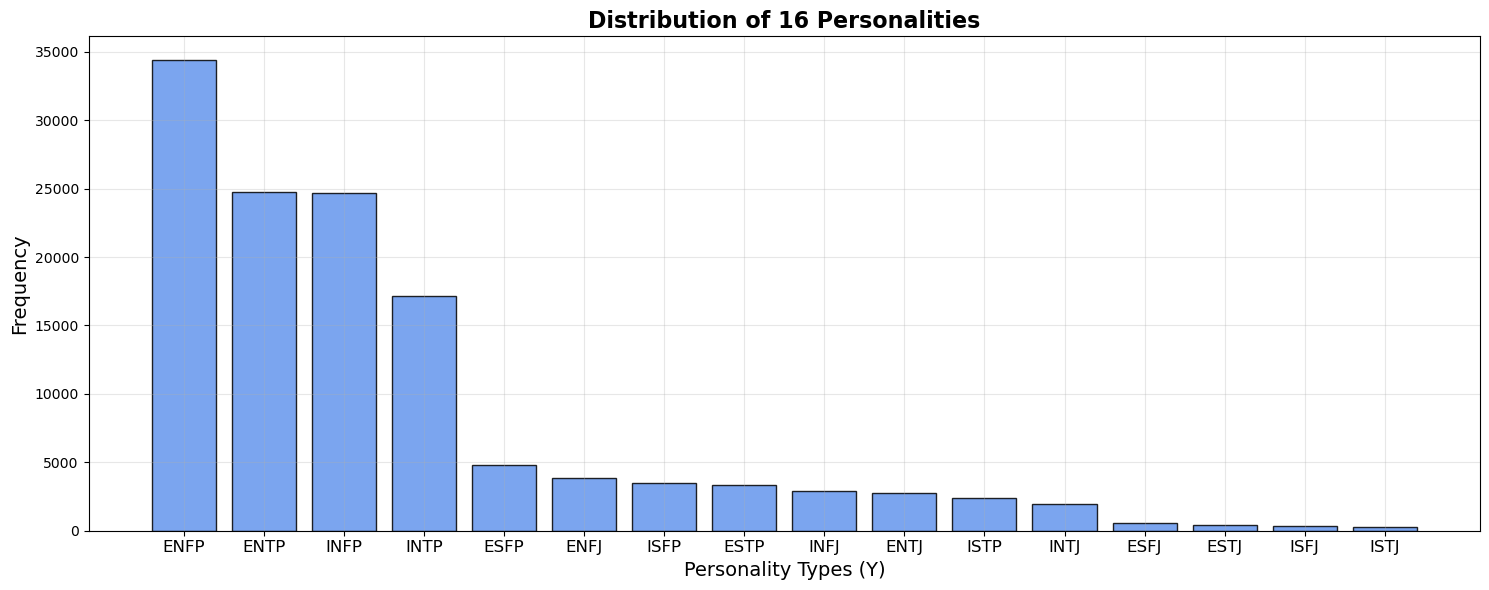

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Get the unique personalities and their frequencies
personalities = df["Personality"].value_counts().index
frequency = df["Personality"].value_counts().values

# Create x positions for each bar with spacing between them
x_positions = np.arange(len(personalities))

# Create the bar plot with space between bars
plt.figure(figsize=(15, 6))
plt.bar(x_positions, frequency, color='cornflowerblue', edgecolor='black', width=0.8, alpha=0.85)  # Adjusted width

# Titles and labels with improved font sizes
plt.title('Distribution of 16 Personalities', fontsize=16, fontweight='bold')
plt.xlabel('Personality Types (Y)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Set x-tick labels with personality names and align them with bars
plt.xticks(x_positions, personalities, rotation=0, ha='center', fontsize=12)

# Add a grid with lighter transparency
plt.grid(True, alpha=0.3)

# Add spacing between the bars by controlling the width and positioning
plt.tight_layout()
plt.savefig('y_distribution.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


Interest         Arts    Others    Sports  Technology   Unknown
Personality                                                    
ENFJ         0.145506  0.148339  0.248004    0.130827  0.327324
ENFP         0.174050  0.179049  0.088158    0.158528  0.400215
ENTJ         0.210564  0.138699  0.217751    0.128997  0.303989
ENTP         0.241201  0.162594  0.083219    0.139655  0.373331
ESFJ         0.162455  0.158845  0.212996    0.113718  0.351986
ESFP         0.173013  0.178394  0.094371    0.156871  0.397351
ESTJ         0.176020  0.145408  0.193878    0.130102  0.354592
ESTP         0.239352  0.162268  0.082184    0.152669  0.363527
INFJ         0.142857  0.147311  0.236040    0.136005  0.337787
INFP         0.177087  0.177896  0.088220    0.158593  0.398203
INTJ         0.186979  0.148438  0.229687    0.114062  0.320833
INTP         0.240719  0.163729  0.079559    0.142424  0.373570
ISFJ         0.161725  0.132075  0.237197    0.132075  0.336927
ISFP         0.182581  0.194444  0.08969

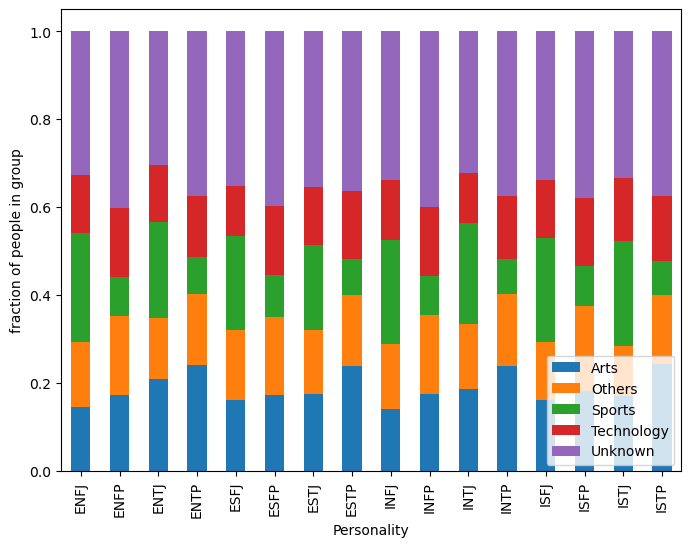

In [12]:
# I want to see if there are specific interests that are more common for certain personalities?
count_matrix = df.groupby([ 'Personality','Interest']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(8,6))
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

/var/folders/9w/j207dmhx2hj6mv2hflhg8zfm0000gn/T/ipykernel_79487/701621400.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


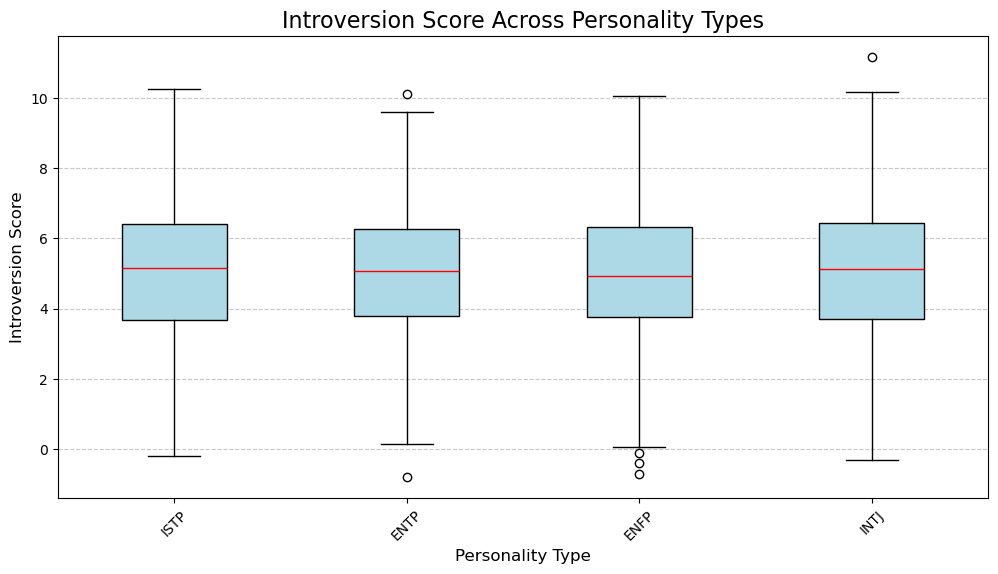

/var/folders/9w/j207dmhx2hj6mv2hflhg8zfm0000gn/T/ipykernel_79487/701621400.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


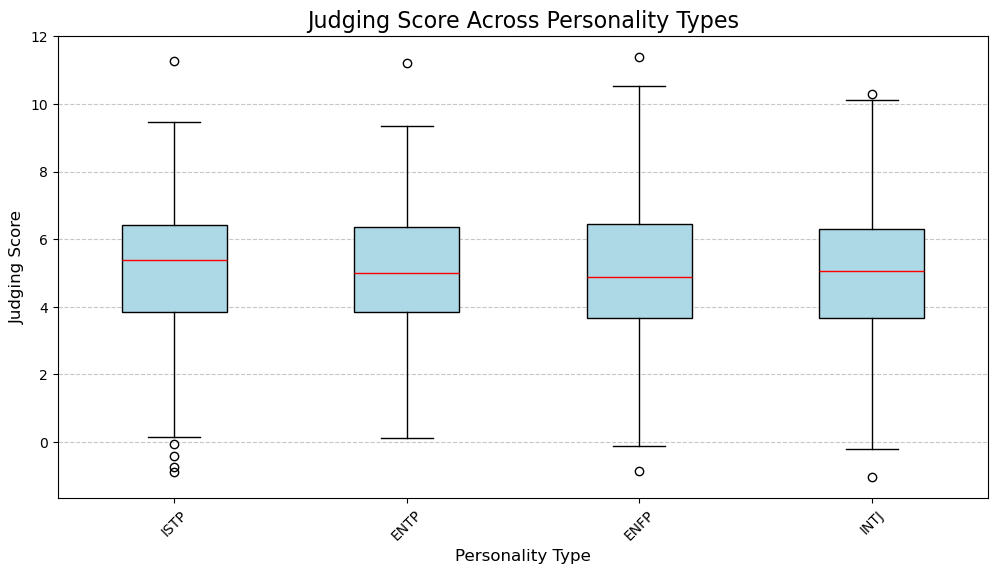

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Simulating a dataset similar to the one described earlier
np.random.seed(42)
n_samples = 1000
df = pd.DataFrame({
    "Personality": np.random.choice(["ENFP", "INTJ", "ISTP", "ENTP"], size=n_samples),
    "Introversion Score": np.random.normal(loc=5, scale=2, size=n_samples),
    "Judging Score": np.random.normal(loc=5, scale=2, size=n_samples)
})

# Continuous features to plot
continuous_features = ["Introversion Score", "Judging Score"]
target = "Personality"

for feature in continuous_features:
    # Create a boxplot for each continuous feature
    plt.figure(figsize=(12, 6))
    plt.boxplot(
        [df.loc[df[target] == personality, feature] for personality in df[target].unique()],
        labels=df[target].unique(),
        patch_artist=True,
        boxprops=dict(facecolor='lightblue', color='black'),
        medianprops=dict(color='red')
    )
    plt.title(f"{feature} Across Personality Types", fontsize=16)
    plt.xlabel("Personality Type", fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


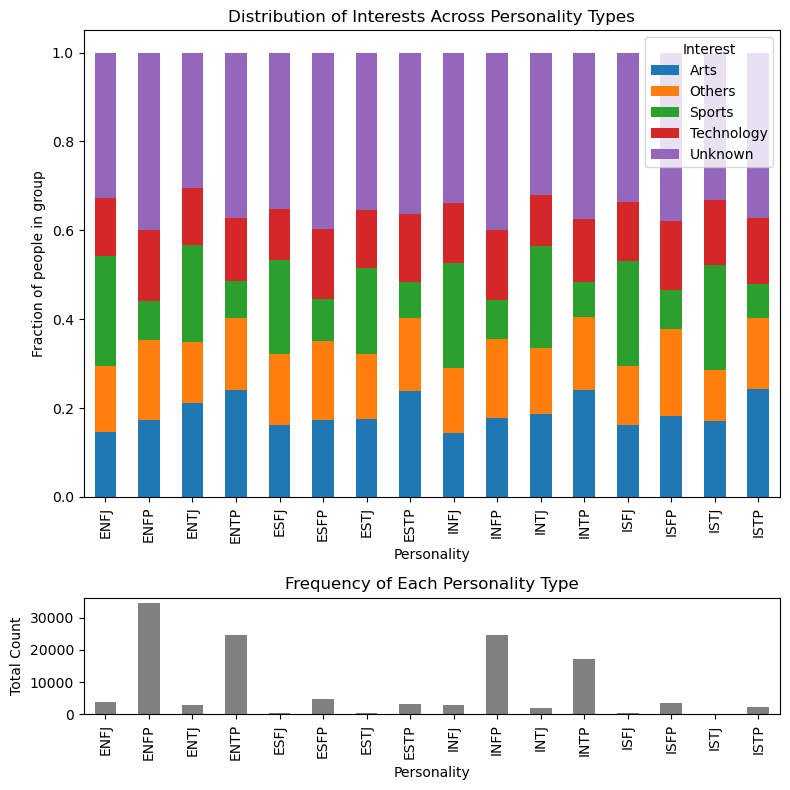

In [13]:
import matplotlib.pyplot as plt

# Group by Personality and Interest, and get the counts
count_matrix = df.groupby(['Personality', 'Interest']).size().unstack()

# Normalize the counts within each personality group (for stacked bar plot)
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis=0)

# Add an extra column to capture the total number of people with each personality
personality_totals = count_matrix.sum(axis=1)

# Create a figure with subplots: one for the stacked bar plot, one for the total frequencies
fig, ax = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios': [4, 1]})

# Plot the normalized data (stacked bars)
count_matrix_norm.plot(kind='bar', stacked=True, ax=ax[0])

# Plot the frequency of each personality as a separate bar plot
personality_totals.plot(kind='bar', ax=ax[1], color='gray')

# Set labels and titles for both plots
ax[0].set_ylabel('Fraction of people in group')
ax[0].set_title('Distribution of Interests Across Personality Types')

ax[1].set_ylabel('Total Count')
ax[1].set_title('Frequency of Each Personality Type')

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('stacked bar plot.png', dpi=300, bbox_inches='tight')
plt.show()


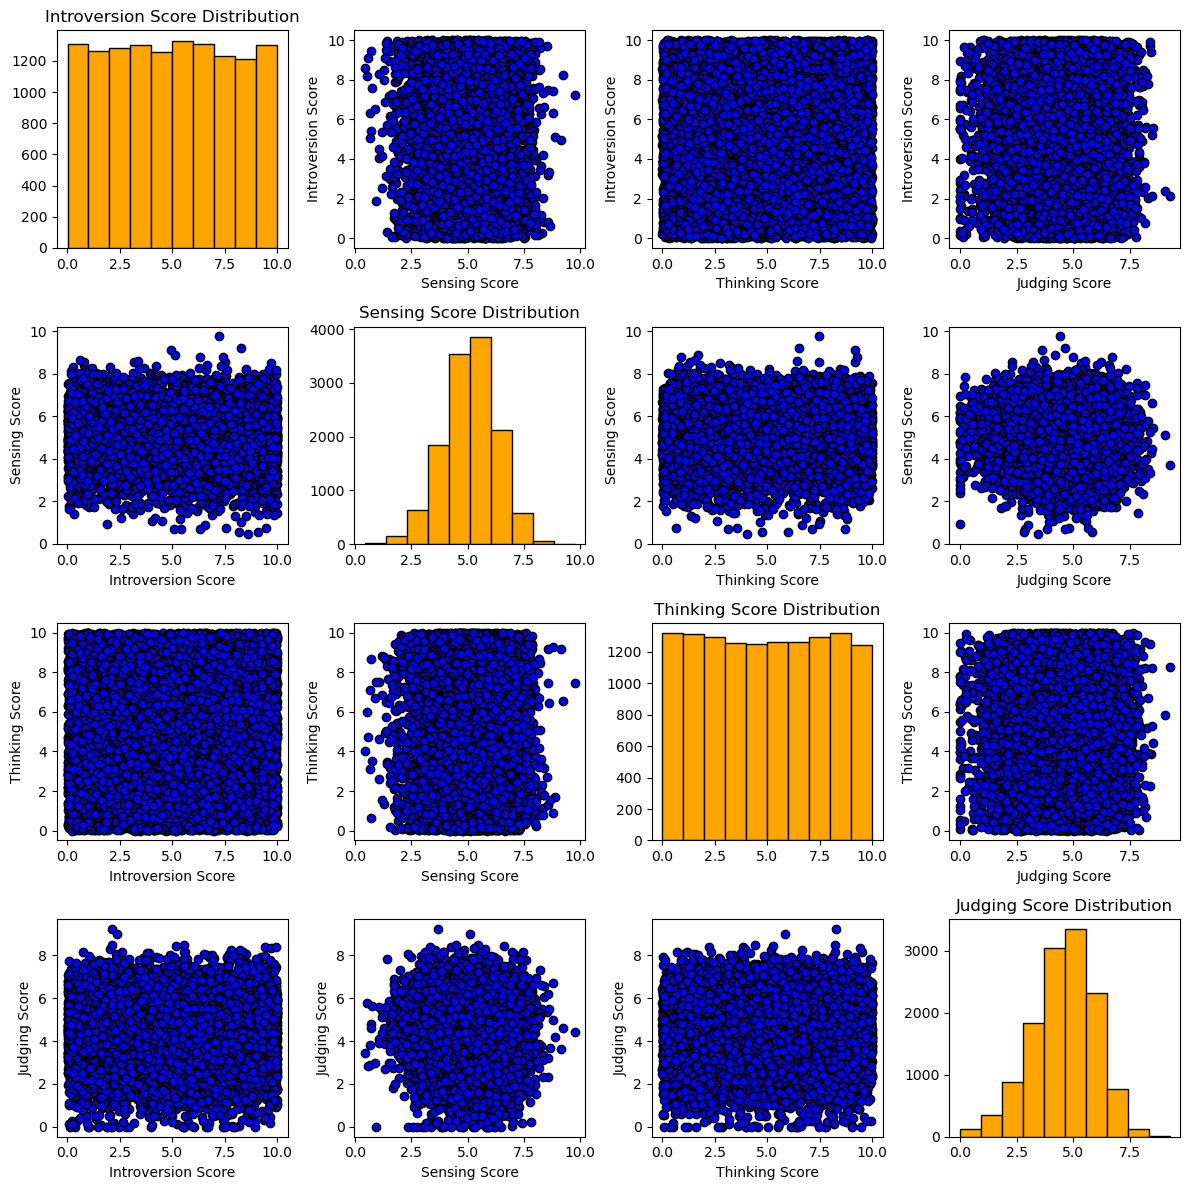

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools

# List of columns for personality trait scores
traits = ['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']

# Create pairwise scatter plots and histograms
num_traits = len(traits)
fig, axes = plt.subplots(nrows=num_traits, ncols=num_traits, figsize=(12, 12))

# Plot scatter plots for off-diagonal and histograms for diagonal
for i, j in itertools.product(range(num_traits), range(num_traits)):
    if i == j:
        # Diagonal: plot histograms
        axes[i, j].hist(df_shrink[traits[i]], bins=10, color='orange', edgecolor='black')
        axes[i, j].set_title(f'{traits[i]} Distribution')
    else:
        # Off-diagonal: plot scatter plots
        axes[i, j].scatter(df_shrink[traits[j]], df_shrink[traits[i]], color='blue', edgecolors='black')
        axes[i, j].set_xlabel(traits[j])
        axes[i, j].set_ylabel(traits[i])

# Adjust layout
plt.tight_layout()
plt.savefig('correlation.png', dpi=300, bbox_inches='tight')
plt.show()


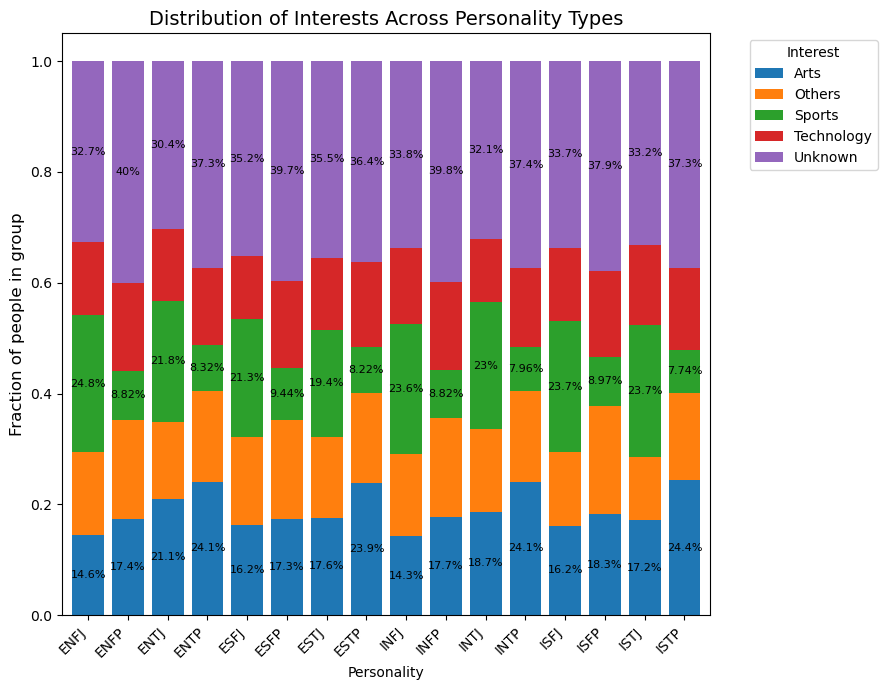

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Group by Personality and Interest, and get the counts
count_matrix = df.groupby(['Personality', 'Interest']).size().unstack()

# Normalize the counts within each personality group (for stacked bar plot)
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis=0)

# Create a single figure for the stacked bar plot
fig, ax = plt.subplots(figsize=(9, 7))

# Plot the normalized data (stacked bars)
count_matrix_norm.plot(kind='bar', stacked=True, ax=ax, width=0.8)

# Set labels and title
ax.set_ylabel('Fraction of people in group', fontsize=12)
ax.set_title('Distribution of Interests Across Personality Types', fontsize=14)
ax.legend(title='Interest', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels and adjust font size for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Add numbers on the stacked bars for Green (Sports), Blue (Arts), and Purple (Unknown) segments
for i, (index, row) in enumerate(count_matrix_norm.iterrows()):
    cum_height = np.zeros(len(row))  # Track the cumulative height of each stacked bar
    for idx, val in enumerate(row):
        if val > 0 and count_matrix.columns[idx] in ['Sports', 'Arts', 'Unknown']:  # Only for 'Sports', 'Arts', and 'Unknown'
            # Display value as percentage with 3 significant figures and reduce the font size to 8
            ax.text(i, cum_height[idx] + val / 2, f'{val * 100:.3g}%', ha='center', va='center', fontsize=8)  # Reduced font size to 8
        cum_height += val  # Update the cumulative height

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


/var/folders/9w/j207dmhx2hj6mv2hflhg8zfm0000gn/T/ipykernel_79487/701621400.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


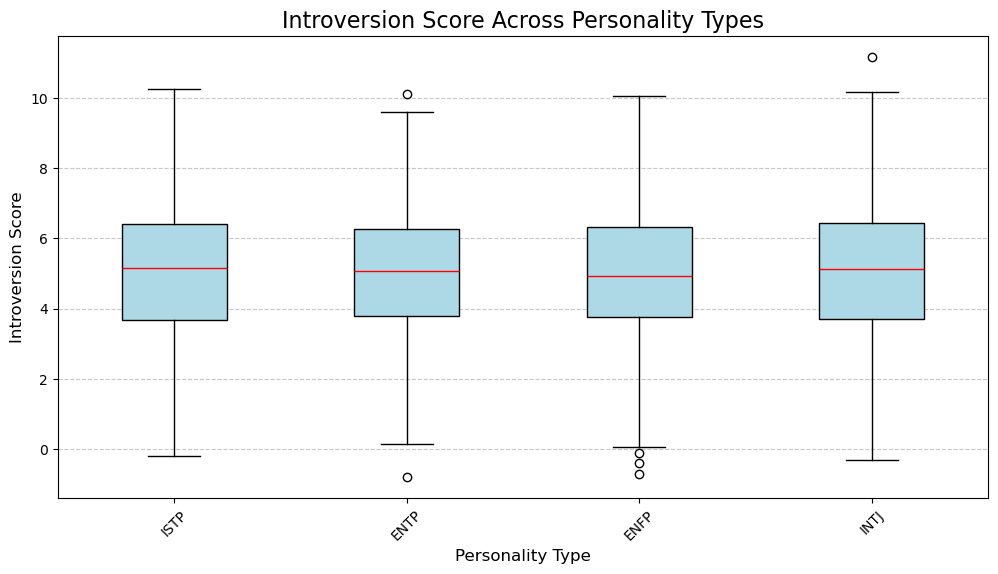

/var/folders/9w/j207dmhx2hj6mv2hflhg8zfm0000gn/T/ipykernel_79487/701621400.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


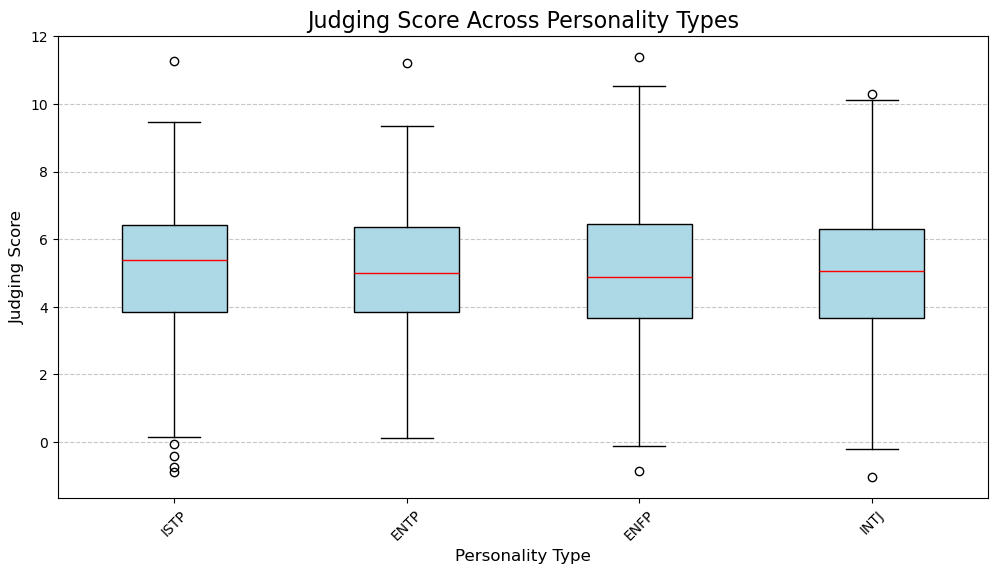

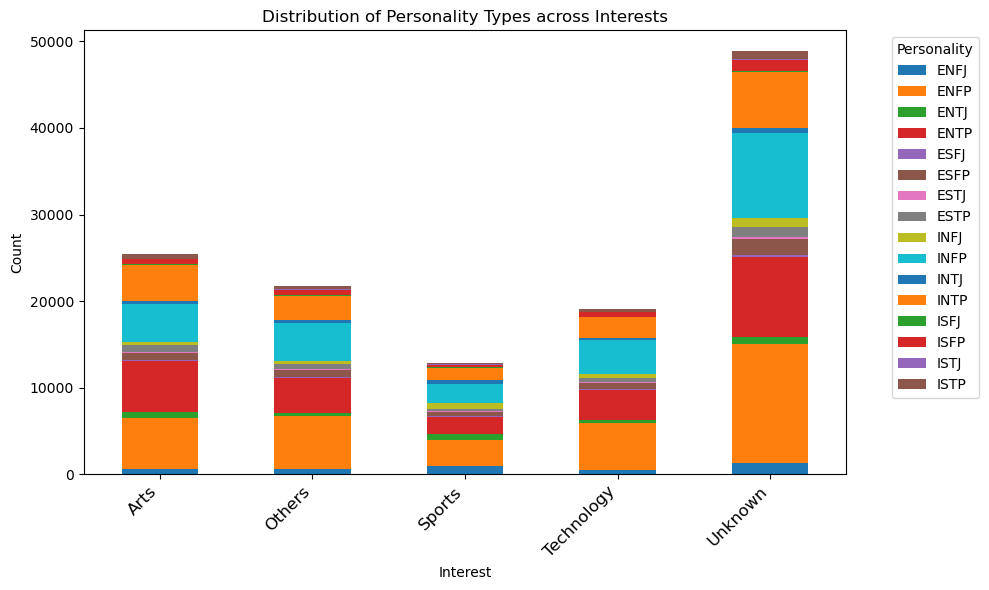

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Interest' and 'Personality' and get the size of each group
count_matrix = df.groupby(['Interest', 'Personality']).size().unstack()

# Plot a stacked bar chart of Interest vs Personality
count_matrix.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the labels and title
plt.ylabel('Count')
plt.title('Distribution of Personality Types across Interests')

# Rotate x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add a legend outside the plot
plt.legend(title='Personality', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


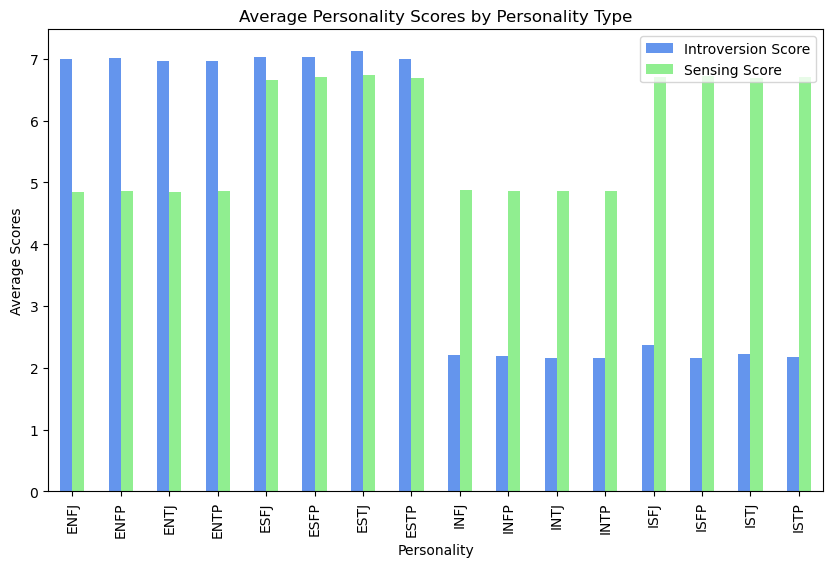

In [17]:
# Group by 'Personality' and plot mean of other numerical features
df.groupby('Personality')[['Introversion Score', 'Sensing Score']].mean().plot(kind='bar', figsize=(10,6), color=['cornflowerblue', 'lightgreen'])
plt.title('Average Personality Scores by Personality Type')
plt.ylabel('Average Scores')
plt.show()


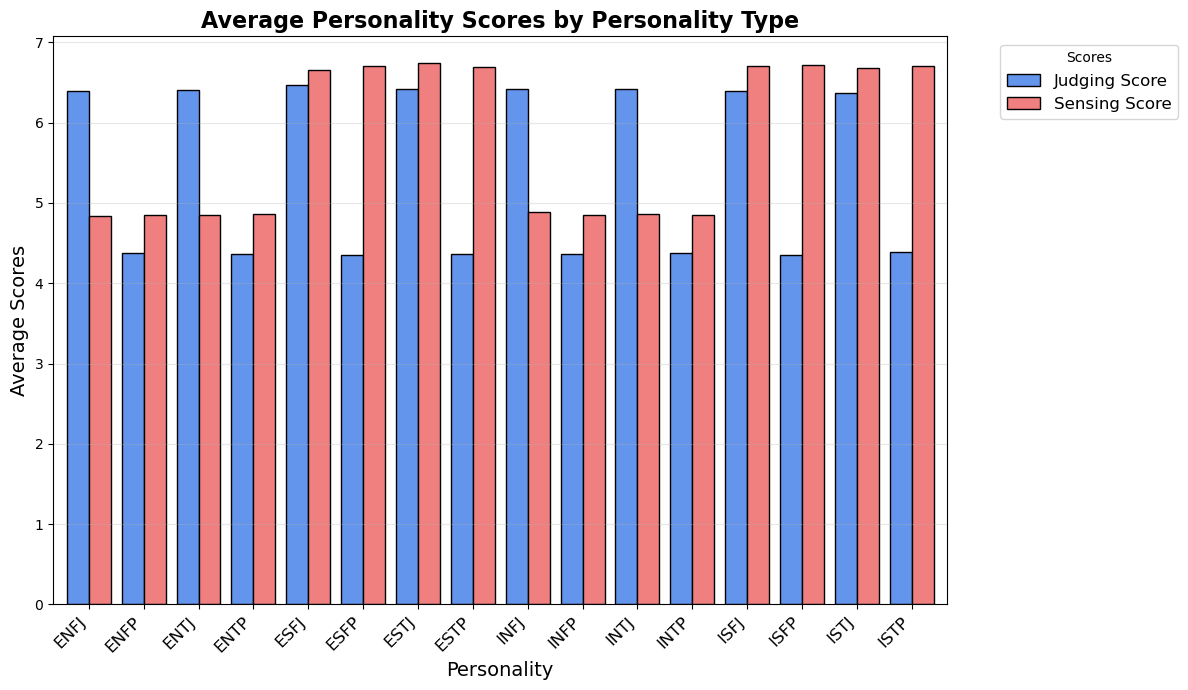

In [18]:
import matplotlib.pyplot as plt

# Group by Personality and plot mean of other numerical features
ax = df.groupby('Personality')[['Judging Score', 'Sensing Score']].mean().plot(kind='bar', 
                                                                              figsize=(12, 7), 
                                                                              color=['cornflowerblue', 'lightcoral'],
                                                                              width=0.8, 
                                                                              edgecolor='black')

# Add title and labels with increased font size
plt.title('Average Personality Scores by Personality Type', fontsize=16, fontweight='bold')
plt.ylabel('Average Scores', fontsize=14)
plt.xlabel('Personality', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust the legend and move it outside the plot
plt.legend(title='Scores', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Add gridlines to improve readability
plt.grid(axis='y', alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()


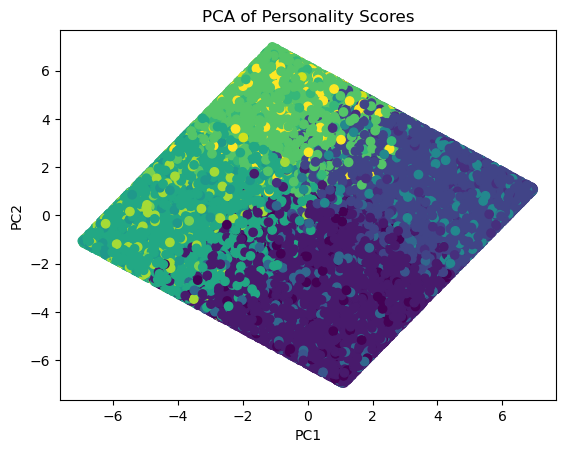

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']])

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Personality'].astype('category').cat.codes, cmap='viridis')
plt.title('PCA of Personality Scores')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


/var/folders/9w/j207dmhx2hj6mv2hflhg8zfm0000gn/T/ipykernel_26597/1573140373.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['Introversion Score'], df['Sensing Score'], df['Thinking Score'], df['Judging Score']], labels=['Introversion', 'Sensing', 'Thinking', 'Judging'])


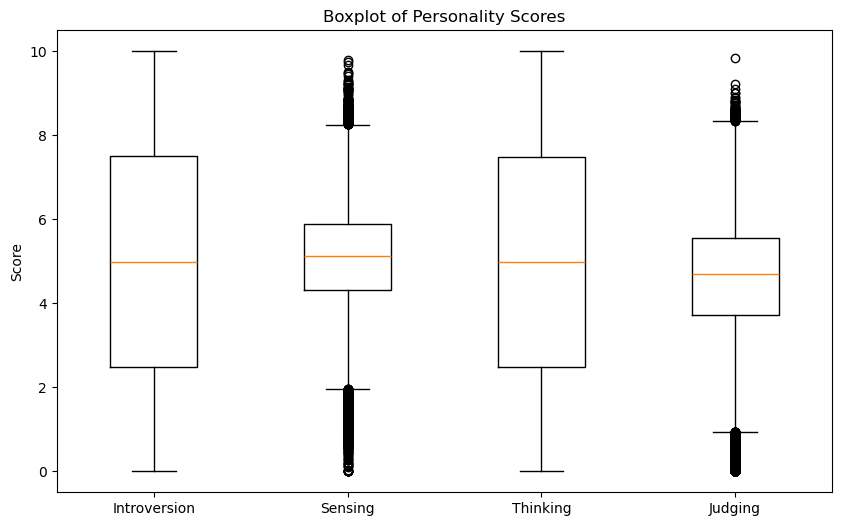

In [20]:
# Boxplot using Matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot([df['Introversion Score'], df['Sensing Score'], df['Thinking Score'], df['Judging Score']], labels=['Introversion', 'Sensing', 'Thinking', 'Judging'])
plt.title('Boxplot of Personality Scores')
plt.ylabel('Score')
plt.show()


In [21]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = df_shrink.drop(columns=['Personality'])  # Dropping the target variable from features
y = df_shrink['Personality']  # Target variable

# Initial stratified split to separate out the test set (80% train, 20% test+validation)
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Now, split the training+validation set into training and validation sets (50% test, 50% validation of the original train+validation set)
X_test, X_val, y_test, y_val = train_test_split(X_other, y_other, test_size=0.5, stratify=y_other, random_state=42)

# X_train, X_val, X_test contain the features for training, validation, and test sets respectively
# y_train, y_val, y_test contain the labels for training, validation, and test sets respectively
X_val.shape

(1281, 8)

In [22]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import StratifiedKFold
# # what we did before: variance in balance on the order of 1%
# random_state = 2
# # Separate the features (X) and the target variable (y)
# X = df_shrink.drop(columns=['Personality'])  # Dropping the target variable from features
# y = df_shrink['Personality']  # Target variable

# X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)
# print('test balance:',np.unique(y_test,return_counts=True))

# # do KFold split on other
# kf = KFold(n_splits=2,shuffle=True,random_state=random_state)
# for train_index, val_index in kf.split(X_other,y_other):
#     print('new fold')
#     X_train = X_other.iloc[train_index]
#     y_train = y_other.iloc[train_index]
#     X_val = X_other.iloc[val_index]
#     y_val = y_other.iloc[val_index]
#     print(np.unique(y_train,return_counts=True))
#     print(np.unique(y_val,return_counts=True))

# X_train.shape

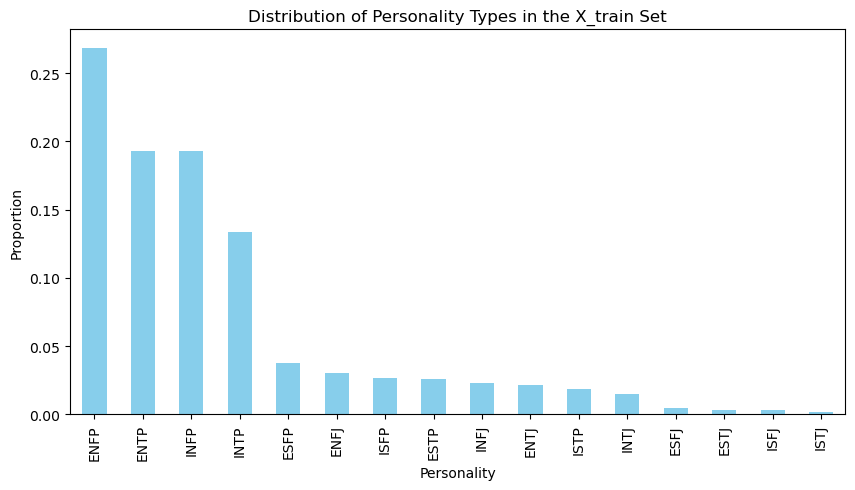

In [23]:
import matplotlib.pyplot as plt

# Plot the distribution of personality types in the X_train set
plt.figure(figsize=(10, 5))
y_train.value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.title('Distribution of Personality Types in the X_train Set')
plt.ylabel('Proportion')
plt.show()


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

# Define feature types based on your dataset
ordinal_ftrs = ['Education']  # Assuming education levels can be ordinal
ordinal_cats = [['0', '1']]  # Adjust categories based on actual values in Education

onehot_ftrs = ['Gender', 'Interest']  # Categorical variables for One-Hot Encoding

minmax_ftrs = ['Age']  # Continuous numerical variable to be scaled to [0, 1]

std_ftrs = ['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']  # Personality scores for standardization

# Create the ColumnTransformer with different preprocessing methods for each feature type
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),  # Use 'sparse' for older versions
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ])

# Create a pipeline that includes the preprocessor
clf = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply the preprocessing pipeline to X_train, X_val, and X_test
X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

# Print the shapes of the preprocessed data
print(X_train.shape)
print(X_train_prep.shape)

(10244, 8)
(10244, 13)


In [25]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

# Create and fit DummyClassifier
baseline_model = DummyClassifier(strategy='most_frequent')  # Baseline predicts the majority class
baseline_model.fit(X_train, y_train)

# Make predictions
baseline_predictions = baseline_model.predict(X_test)

# Evaluate F1 score
baseline_f1 = f1_score(y_test, baseline_predictions, average='macro') 
print(f"Baseline F1 Score (Macro): {baseline_f1:.3f}")

Baseline F1 Score (Macro): 0.026


In [3]:
from sklearn.preprocessing import LabelEncoder

# Class frequencies from the image
class_counts = {
    'ENFJ': 3883, 'ENFP': 34404, 'ENTJ': 2783, 'ENTP': 24718,
    'ESFJ': 554, 'ESFP': 4832, 'ESTJ': 392, 'ESTP': 3334,
    'INFJ': 2919, 'INFP': 24711, 'INTJ': 1920, 'INTP': 17132,
    'ISFJ': 371, 'ISFP': 3456, 'ISTJ': 262, 'ISTP': 2390
}

# Total number of samples
total_samples = sum(class_counts.values())

# Compute class weights
class_weights = {cls: total_samples / (len(class_counts) * count) for cls, count in class_counts.items()}

# Encode the class labels if they are not integers
label_encoder = LabelEncoder()
encoded_classes = label_encoder.fit_transform(list(class_counts.keys()))  # Encodes to [0, 1, ..., 15]

# Map encoded class indices to their weights
class_weight_dict = {encoded_class: class_weights[cls] for encoded_class, cls in zip(encoded_classes, class_counts)}

print("Class Weights for RandomForestClassifier:")
print(class_weight_dict)


Class Weights for RandomForestClassifier:
{0: 2.061244527427247, 1: 0.23264191663760028, 2: 2.8759656845131154, 3: 0.32380502063273725, 4: 14.447314981949459, 5: 1.656418149834437, 6: 20.417889030612244, 7: 2.4006636172765448, 8: 2.741970709146968, 9: 0.32389674638824817, 10: 4.16865234375, 11: 0.4671849462993229, 12: 21.57361859838275, 13: 2.31591796875, 14: 30.548902671755727, 15: 3.3488755230125524}


In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd

# Define your preprocessor with feature groups and transformations
ordinal_ftrs = ['Education']  
ordinal_cats = [['0', '1']] 

onehot_ftrs = ['Gender', 'Interest'] 
minmax_ftrs = ['Age'] 
std_ftrs = ['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']  

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ]
)

param_grid = {
    'model__n_estimators': [50, 100, 300],
    'model__max_depth': [10, 20, 30],
    'model__max_features': [0.25, 0.5,0.75,1.0]
}

X = df.drop(columns=['Personality']) 
y = df['Personality']  
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
#X, _, y, _ = train_test_split(X, y, test_size=0.9, stratify=y, random_state=42)

# Define the function for train-val-test pipeline with multiple random states
def MLpipe_Train_Val_Test(X, y, preprocessor, ML_algo, param_grid):
    all_test_scores = []
    random_states = [7, 21,42]
    #random_states = [42]
    for random_state in random_states:
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=random_state)

        kf = KFold(n_splits=5, shuffle=True, random_state=random_state)

        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', ML_algo)
        ])

        # Grid search with k-fold cross-validation
        grid_search = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            cv=kf, 
            scoring='f1_macro',
            n_jobs=-1,
            verbose=0
        )

        # Train the model on the training set and validate using cross-validation
        grid_search.fit(X_other, y_other)

        # Get the best model and its performance on the validation set
        best_model = grid_search.best_estimator_
        
        y_test_pred = best_model.predict(X_test)
        test_score = f1_score(y_test, y_test_pred, average='macro')
        all_test_scores.append(test_score)

        print(f"Random State: {random_state}")
        print(f"Best Hyperparameters: {grid_search.best_params_}")
        print(f"Validation F1 Macro Score (Cross-Validated): {grid_search.best_score_:.3f}")
        print(f"Test F1 Macro Score: {test_score:.3f}")
        print("----------------------------------------")

    mean_test_score = np.mean(all_test_scores)
    std_test_score = np.std(all_test_scores)

    print(f"Mean Test F1 Macro Score: {mean_test_score:.3f}")
    print(f"Standard Deviation of Test F1 Macro Score: {std_test_score:.3f}")

    return best_model, mean_test_score, std_test_score

# Run the function with multiple random states
print("Random Forest")  # Example random states
best_model, mean_test_score, std_test_score = MLpipe_Train_Val_Test(
    X, y, preprocessor, RandomForestClassifier(class_weight = class_weight_dict), param_grid)


Random Forest


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Random State: 7
Best Hyperparameters: {'model__max_depth': 20, 'model__max_features': 0.25, 'model__n_estimators': 300}
Validation F1 Macro Score (Cross-Validated): 0.857
Test F1 Macro Score: 0.857
----------------------------------------


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Random State: 21
Best Hyperparameters: {'model__max_depth': 20, 'model__max_features': 0.25, 'model__n_estimators': 100}
Validation F1 Macro Score (Cross-Validated): 0.858
Test F1 Macro Score: 0.874
----------------------------------------


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [59]:
%%time
# SVC
from sklearn.svm import SVC
# Parameter grid for SVC
param_grid = {
    'model__C': [0.1, 1, 10],          # Regularization parameter # Kernel types: linear or RBF (Radial Basis Function)
    'model__gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

print('SVC')
best_model, val_score, test_score = MLpipe_Train_Val_Test(X, y, preprocessor, SVC(class_weight = class_weight_dict), param_grid)

SVC
Random State: 7
Best Hyperparameters: {'model__C': 10, 'model__gamma': 'scale'}
Validation F1 Macro Score (Cross-Validated): 0.759
Test F1 Macro Score: 0.772
----------------------------------------
Random State: 21
Best Hyperparameters: {'model__C': 10, 'model__gamma': 'scale'}
Validation F1 Macro Score (Cross-Validated): 0.759
Test F1 Macro Score: 0.780
----------------------------------------
Random State: 42
Best Hyperparameters: {'model__C': 10, 'model__gamma': 'scale'}
Validation F1 Macro Score (Cross-Validated): 0.759
Test F1 Macro Score: 0.770
----------------------------------------
Mean Test F1 Macro Score: 0.774
Standard Deviation of Test F1 Macro Score: 0.004
CPU times: user 4min 15s, sys: 10.6 s, total: 4min 25s
Wall time: 1h 25min 24s


In [60]:
%%time
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_sample_weight
import warnings
import numpy as np

warnings.filterwarnings('ignore', category=UserWarning, module='xgboost')

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'model__n_estimators': [50, 100, 200],  # Number of trees
    'model__learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'model__max_depth': [3, 5, 7],  # Maximum depth of a tree
    'model__subsample': [0.2, 0.5, 0.8],  # Fraction of samples used for training each tree
}

# Prepare the dataset
X = df.drop(columns=['Personality'])
y = df['Personality']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Define preprocessor for the pipeline
ordinal_ftrs = ['Education']
ordinal_cats = [['0', '1']]

onehot_ftrs = ['Gender', 'Interest']
minmax_ftrs = ['Age']
std_ftrs = ['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ]
)

# Calculate class weights
class_counts = {
    "ENFJ": 3883, "ENFP": 34404, "ENTJ": 2783, "ENTP": 24718, "ESFJ": 554,
    "ESFP": 4832, "ESTJ": 392, "ESTP": 3334, "INFJ": 2919, "INFP": 24711,
    "INTJ": 1920, "INTP": 17132, "ISFJ": 371, "ISFP": 3456, "ISTJ": 262,
    "ISTP": 2390
}

# Total number of samples
total_samples = sum(class_counts.values())
class_weights = {label_encoder.transform([cls])[0]: total_samples / (len(class_counts) * count)
                 for cls, count in class_counts.items()}

print("Class Weights:", class_weights)

# Define the function for train-val-test pipeline with sample weights
def MLpipe_Train_Val_Test(X, y, preprocessor, ML_algo, param_grid):
    all_test_scores = []
    random_states = [42, 21, 7]

    for random_state in random_states:
        # Stratified splitting
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=random_state)

        # Compute sample weights for training
        sample_weights = compute_sample_weight(class_weight=class_weights, y=y_other)

        kf = KFold(n_splits=5, shuffle=True, random_state=random_state)

        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', ML_algo)
        ])

        # Grid search with k-fold cross-validation
        grid_search = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            cv=kf,
            scoring='f1_macro',
            n_jobs=-1,
            verbose=0
        )

        # Fit the model with sample weights
        grid_search.fit(X_other, y_other, model__sample_weight=sample_weights)

        # Get the best model and evaluate on the test set
        best_model = grid_search.best_estimator_
        y_test_pred = best_model.predict(X_test)
        test_score = f1_score(y_test, y_test_pred, average='macro')
        all_test_scores.append(test_score)

        print(f"Random State: {random_state}")
        print(f"Best Hyperparameters: {grid_search.best_params_}")
        print(f"Validation F1 Macro Score (Cross-Validated): {grid_search.best_score_:.3f}")
        print(f"Test F1 Macro Score: {test_score:.3f}")
        print("----------------------------------------")

    mean_test_score = np.mean(all_test_scores)
    std_test_score = np.std(all_test_scores)

    print(f"Mean Test F1 Macro Score: {mean_test_score:.3f}")
    print(f"Standard Deviation of Test F1 Macro Score: {std_test_score:.3f}")

    return best_model, mean_test_score, std_test_score

X, _, y, _ = train_test_split(X, y, test_size=0.95, stratify=y, random_state=42)
# Run the function with sample weights
print("XGBoost with Sample Weights")
best_model, mean_test_score, std_test_score = MLpipe_Train_Val_Test(
    X, y, preprocessor,
    XGBClassifier(eval_metric="mlogloss"),
    param_grid_xgb
)

Class Weights: {0: 2.061244527427247, 1: 0.23264191663760028, 2: 2.8759656845131154, 3: 0.32380502063273725, 4: 14.447314981949459, 5: 1.656418149834437, 6: 20.417889030612244, 7: 2.4006636172765448, 8: 2.741970709146968, 9: 0.32389674638824817, 10: 4.16865234375, 11: 0.4671849462993229, 12: 21.57361859838275, 13: 2.31591796875, 14: 30.548902671755727, 15: 3.3488755230125524}
XGBoost with Sample Weights
Random State: 42
Best Hyperparameters: {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200, 'model__subsample': 0.8}
Validation F1 Macro Score (Cross-Validated): 0.850
Test F1 Macro Score: 0.856
----------------------------------------
Random State: 21
Best Hyperparameters: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200, 'model__subsample': 0.8}
Validation F1 Macro Score (Cross-Validated): 0.851
Test F1 Macro Score: 0.865
----------------------------------------
Random State: 7
Best Hyperparameters: {'model__learning_rate': 0.

In [61]:
%%time
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress MallocStackLogging and ConvergenceWarning
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)
# Define parameter grid for Logistic Regression
param_grid_lr = {
    'model__penalty': ['l1', 'l2'],
    'model__C': [0.01, 0.1, 1],
    'model__solver': ['saga'],
}

# Run Logistic Regression with grid search and the defined parameter grid
print("Logistic Regression...")
best_model, val_score, test_score = MLpipe_Train_Val_Test(
    X, y, preprocessor,
 LogisticRegression(max_iter=500,class_weight = class_weight_dict), param_grid_lr)

Logistic Regression...


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/py

Random State: 42
Best Hyperparameters: {'model__C': 1, 'model__penalty': 'l1', 'model__solver': 'saga'}
Validation F1 Macro Score (Cross-Validated): 0.672
Test F1 Macro Score: 0.676
----------------------------------------


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/py

Random State: 21
Best Hyperparameters: {'model__C': 1, 'model__penalty': 'l1', 'model__solver': 'saga'}
Validation F1 Macro Score (Cross-Validated): 0.673
Test F1 Macro Score: 0.690
----------------------------------------


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/py

Random State: 7
Best Hyperparameters: {'model__C': 0.1, 'model__penalty': 'l1', 'model__solver': 'saga'}
Validation F1 Macro Score (Cross-Validated): 0.667
Test F1 Macro Score: 0.688
----------------------------------------
Mean Test F1 Macro Score: 0.685
Standard Deviation of Test F1 Macro Score: 0.006
CPU times: user 3min 25s, sys: 5.41 s, total: 3min 30s
Wall time: 25min 11s


In [62]:
%%time
from sklearn.tree import DecisionTreeClassifier
print("Decision Tree")
param_grid_dt = {
    'model__criterion': ['gini', 'entropy'],   # Function to measure the quality of a split
    'model__max_depth': [None, 10, 20, 30],    # Maximum depth of the tree
    'model__min_samples_split': [2, 5,10],    # Minimum number of samples required to split an internal node
    'model__min_samples_leaf': [1, 2,5]       # Minimum number of samples required to be at a leaf node
}


best_model, val_score, test_score = MLpipe_Train_Val_Test(
    X, y, preprocessor,DecisionTreeClassifier(class_weight = class_weight_dict), param_grid_dt)

Decision Tree
Random State: 42
Best Hyperparameters: {'model__criterion': 'entropy', 'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Validation F1 Macro Score (Cross-Validated): 0.819
Test F1 Macro Score: 0.820
----------------------------------------
Random State: 21
Best Hyperparameters: {'model__criterion': 'entropy', 'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Validation F1 Macro Score (Cross-Validated): 0.814
Test F1 Macro Score: 0.839
----------------------------------------
Random State: 7
Best Hyperparameters: {'model__criterion': 'entropy', 'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5}
Validation F1 Macro Score (Cross-Validated): 0.812
Test F1 Macro Score: 0.822
----------------------------------------
Mean Test F1 Macro Score: 0.827
Standard Deviation of Test F1 Macro Score: 0.008
CPU times: user 12.3 s, sys: 4.89 s, total: 17.2 s
Wall time: 3min 49s


In [63]:
# %%time
# # Naive Bayes
# from sklearn.naive_bayes import GaussianNB

# # Naive Bayes does not have hyperparameters to tune like `n_neighbors` for KNN,
# # so we can provide an empty parameter grid.
# param_grid = {
#     'model__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
# }

# # Initialize the Naive Bayes model
# ML_algo = GaussianNB()
# print('Naive Bayes')

# # Use the same pipeline function for stratified classification
# test_scores, best_models = MLpipe_Stratified_Classification(X, y, preprocessor, ML_algo, param_grid)


In [64]:
# %%time
# # Neural Network
# from sklearn.neural_network import MLPClassifier

# # Parameter grid for tuning the neural network
# param_grid = {
#     'model__hidden_layer_sizes': [(50,), (100,), (100, 50)],  # Different architectures
#     'model__activation': ['relu', 'tanh'],  # Activation functions
#     'model__learning_rate_init': [0.0001, 0.001, 0.01],  # Learning rates
#     'model__max_iter': [500, 1000]  # Number of iterations
# }

# # Initialize the MLPClassifier
# ML_algo = MLPClassifier(
#     random_state=42,
#     early_stopping=True,  # Stops training if validation score stops improving
#     validation_fraction=0.1,  # Use 10% of training data for validation
#     verbose=False  # Set to True if you want to monitor convergence
# )

# print('Neural Network')

# # Use the same pipeline function for stratified classification
# test_scores, best_models = MLpipe_Stratified_Classification(X, y, preprocessor, ML_algo, param_grid)


/var/folders/9w/j207dmhx2hj6mv2hflhg8zfm0000gn/T/ipykernel_26597/3666894595.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(scores, labels=model_names, showmeans=True)


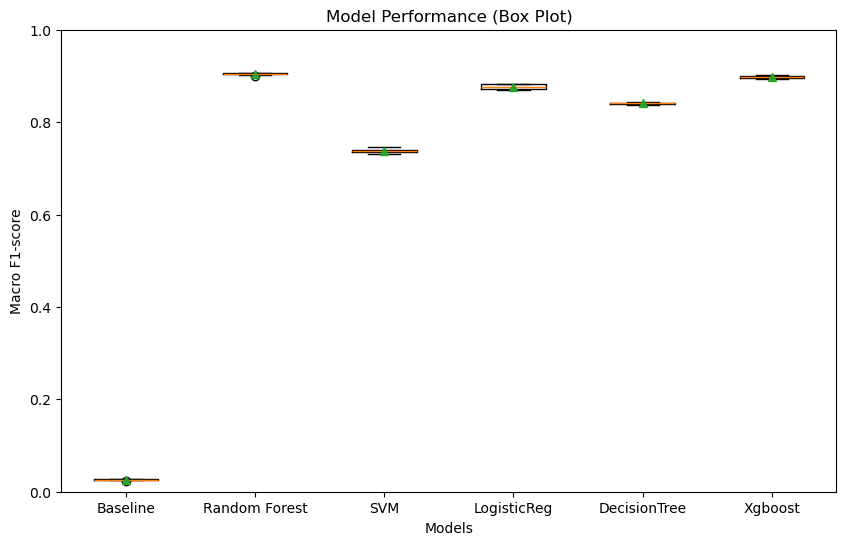

In [65]:
import matplotlib.pyplot as plt

# Example Data
model_names = ['Baseline', 'Random Forest','SVM', 'Xgboost','LogisticReg','DecisionTree']
mean_scores = [baseline_f1, 0.866, 0.774, 0.858,0.685,0.827]  # Replace with actual means
std_scores = [0.001, 0.007, 0.004,0.005,0.006,0.008]  # Replace with actual stds


scores = [np.random.normal(loc=mean, scale=std, size=10) for mean, std in zip(mean_scores, std_scores)]
plt.figure(figsize=(10, 6))
plt.boxplot(scores, labels=model_names, showmeans=True)
plt.xlabel('Models')
plt.ylabel('Macro F1-score')
plt.title('Model Performance (Box Plot)')
plt.ylim(0, 1)
#plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
plt.show()


## Final model

In [5]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd

# Define your preprocessor with feature groups and transformations
ordinal_ftrs = ['Education']  
ordinal_cats = [['0', '1']] 

onehot_ftrs = ['Gender', 'Interest'] 
minmax_ftrs = ['Age'] 
std_ftrs = ['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']  

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ]
)

param_grid_xgb = {
    'model__n_estimators': [200],  # Number of trees
    'model__learning_rate': [0.1],  # Step size shrinkage
    'model__max_depth': [3],  # Maximum depth of a tree
    'model__subsample': [0.8],  # Fraction of samples used for training each tree
}

X = df.drop(columns=['Personality']) 
y = df['Personality']  
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
#X, _, y, _ = train_test_split(X, y, test_size=0.9, stratify=y, random_state=42)

# Define the function for train-val-test pipeline with multiple random states
def MLpipe_Train_Val_Test(X, y, preprocessor, ML_algo, param_grid):
    all_test_scores = []
    random_states = [7, 21,42]
    for random_state in random_states:
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=random_state)

        kf = KFold(n_splits=5, shuffle=True, random_state=random_state)

        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', ML_algo)
        ])

        # Grid search with k-fold cross-validation
        grid_search = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            cv=kf, 
            scoring='f1_macro',
            n_jobs=-1,
            verbose=0
        )

        # Train the model on the training set and validate using cross-validation
        grid_search.fit(X_other, y_other)

        # Get the best model and its performance on the validation set
        best_model = grid_search.best_estimator_
        
        y_test_pred = best_model.predict(X_test)
        test_score = f1_score(y_test, y_test_pred, average='macro')
        all_test_scores.append(test_score)

        print(f"Random State: {random_state}")
        print(f"Best Hyperparameters: {grid_search.best_params_}")
        print(f"Validation F1 Macro Score (Cross-Validated): {grid_search.best_score_:.3f}")
        print(f"Test F1 Macro Score: {test_score:.3f}")
        print("----------------------------------------")

    mean_test_score = np.mean(all_test_scores)
    std_test_score = np.std(all_test_scores)
    feature_names = grid.best_estimator_[0].get_feature_names_out()
    print(f"Mean Test F1 Macro Score: {mean_test_score:.3f}")
    print(f"Standard Deviation of Test F1 Macro Score: {std_test_score:.3f}")

    return np.array(feature_names)best_model, mean_test_score, std_test_score

# Run the function with multiple random states
print("XGBoost")
feature_names,best_model, val_score, test_score = MLpipe_Train_Val_Test(
    X, y, preprocessor,
    XGBClassifier(eval_metric="mlogloss"),  # Removed `use_label_encoder`
    param_grid_xgb)

XGBoost


NameError: name 'XGBClassifier' is not defined

In [ ]:
# Adjusted function to return X_train from the best fold and random state
def MLpipe_Train_Val_Test(X, y, preprocessor, ML_algo, param_grid):
    all_test_scores = []
    best_mean_validation_score = -np.inf  # To track the best validation score
    best_random_state = None
    best_X_train = None
    best_y_train = None
    
    random_states = [7, 21, 42]

    for random_state in random_states:
        # Split into test and other data
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=random_state)

        kf = KFold(n_splits=5, shuffle=True, random_state=random_state)

        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', ML_algo)
        ])

        # Grid search with k-fold cross-validation
        grid_search = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            cv=kf,
            scoring='f1_macro',
            n_jobs=-1,
            verbose=0,
            return_train_score=True
        )

        # Train the model on the training set and validate using cross-validation
        grid_search.fit(X_other, y_other)

        # Get the best model and its performance on the validation set
        best_model = grid_search.best_estimator_
        best_fold_mean_score = grid_search.best_score_

        # Check if this is the best random state and fold
        if best_fold_mean_score > best_mean_validation_score:
            best_mean_validation_score = best_fold_mean_score
            best_random_state = random_state
            
            # Extract the best train data (X_train and y_train) for the best fold
            best_split_indices = list(kf.split(X_other, y_other))[grid_search.best_index_ % 5]
            train_indices, _ = best_split_indices
            best_X_train = X_other.iloc[train_indices]
            best_y_train = y_other[train_indices]

        # Predict on the test data
        y_test_pred = best_model.predict(X_test)
        test_score = f1_score(y_test, y_test_pred, average='macro')
        all_test_scores.append(test_score)

        print(f"Random State: {random_state}")
        print(f"Best Hyperparameters: {grid_search.best_params_}")
        print(f"Validation F1 Macro Score (Cross-Validated): {grid_search.best_score_:.3f}")
        print(f"Test F1 Macro Score: {test_score:.3f}")
        print("----------------------------------------")

    mean_test_score = np.mean(all_test_scores)
    std_test_score = np.std(all_test_scores)
    feature_names = grid_search.best_estimator_[0].get_feature_names_out()

    print(f"Best Random State: {best_random_state}")
    print(f"Mean Test F1 Macro Score: {mean_test_score:.3f}")
    print(f"Standard Deviation of Test F1 Macro Score: {std_test_score:.3f}")

    return grid_search, best_model, mean_test_score, std_test_score, X_test, np.array(feature_names), y_test_pred, X_test, y_test, best_X_train, best_y_train

# Run the function with multiple random states
print("Random Forest")
grid_search, best_model, mean_test_score, std_test_score, X_test, feature_names, y_test_pred, X_test, y_test, best_X_train, best_y_train = MLpipe_Train_Val_Test(
    X, y, preprocessor, RandomForestClassifier(class_weight=class_weight_dict), param_grid)

# Check the best training data
print(f"Best X_train shape: {best_X_train.shape}")
print(f"Best y_train length: {len(best_y_train)}")


In [16]:
import os
import pickle

# Create necessary directories if they don't exist
os.makedirs("data", exist_ok=True)
os.makedirs("results", exist_ok=True)

# Save processed data
processed_data_path = "data/processed_data.csv"
X_test_df = pd.DataFrame(X_test, columns=feature_names)
X_test_df['True_Label'] = y_test
X_test_df['Predicted_Label'] = y_test_pred
X_test_df.to_csv(processed_data_path, index=False)
print(f"Processed data saved to {processed_data_path}")

# Save best model
model_path = "results/best_model.pkl"
with open(model_path, "wb") as f:
    pickle.dump(best_model, f)
print(f"Best model saved to {model_path}")

# Save test predictions
predictions_path = "results/test_predictions.csv"
test_predictions = pd.DataFrame({
    "True_Label": y_test,
    "Predicted_Label": y_test_pred
})
test_predictions.to_csv(predictions_path, index=False)
print(f"Test predictions saved to {predictions_path}")


Processed data saved to data/processed_data.csv
Best model saved to results/best_model.pkl
Test predictions saved to results/test_predictions.csv


In [19]:
import os
import pickle
import pandas as pd

# Create necessary directories if they don't exist
os.makedirs("data", exist_ok=True)
os.makedirs("results", exist_ok=True)

def save_and_return_results(X_test, y_test, y_test_pred, feature_names, best_model, best_X_train, best_y_train):
    # Save processed data
    processed_data_path = "data/processed_data.csv"
    X_test_df = pd.DataFrame(X_test, columns=feature_names)
    X_test_df['True_Label'] = y_test
    X_test_df['Predicted_Label'] = y_test_pred
    X_test_df.to_csv(processed_data_path, index=False)
    print(f"Processed data saved to {processed_data_path}")

    # Save best model
    model_path = "results/best_model.pkl"
    with open(model_path, "wb") as f:
        pickle.dump(best_model, f)
    print(f"Best model saved to {model_path}")

    # Save test predictions
    predictions_path = "results/test_predictions.csv"
    test_predictions = pd.DataFrame({
        "True_Label": y_test,
        "Predicted_Label": y_test_pred
    })
    test_predictions.to_csv(predictions_path, index=False)
    print(f"Test predictions saved to {predictions_path}")

    # Save training data for the best fold
    train_data_path = "data/best_train_data.csv"
    best_X_train_df = pd.DataFrame(best_X_train, columns=feature_names)
    best_X_train_df['True_Label'] = best_y_train
    best_X_train_df.to_csv(train_data_path, index=False)
    print(f"Best fold training data saved to {train_data_path}")

    # Return all necessary outputs
    return {
        "X_test": X_test,
        "y_test": y_test,
        "y_test_pred": y_test_pred,
        "best_model": best_model,
        "best_X_train": best_X_train,
        "best_y_train": best_y_train,
        "processed_data_path": processed_data_path,
        "model_path": model_path,
        "predictions_path": predictions_path,
        "train_data_path": train_data_path
    }

# Example usage (replace these with actual data from your model pipeline)
results = save_and_return_results(
    X_test=X_test,
    y_test=y_test,
    y_test_pred=y_test_pred,
    feature_names=feature_names,
    best_model=best_model,
    best_X_train=best_X_train,
    best_y_train=best_y_train
)

# Access returned values
print(f"Returned X_test shape: {results['X_test'].shape}")
print(f"Returned Best Model: {results['best_model']}")
print(f"Paths saved: {results['processed_data_path']}, {results['model_path']}, {results['predictions_path']}, {results['train_data_path']}")


Processed data saved to data/processed_data.csv
Best model saved to results/best_model.pkl
Test predictions saved to results/test_predictions.csv
Best fold training data saved to data/best_train_data.csv
Returned X_test shape: (12807, 8)
Returned Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ord',
                                                  OrdinalEncoder(categories=[['0',
                                                                              '1']]),
                                                  ['Education']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Interest']),
                                                 ('minmax', MinMaxScaler(),
                              

In [22]:
# Convert transformed X_test to DataFrame
X_test_df = pd.DataFrame(transformed_X_test, columns=feature_names)

# Add true and predicted labels
X_test_df['True_Label'] = y_test
X_test_df['Predicted_Label'] = y_test_pred
print(X_test_df.head())  # Verify contents

# Convert transformed X_train to DataFrame
X_train_df = pd.DataFrame(transformed_X_train, columns=feature_names)
X_train_df['True_Label'] = best_y_train
print(X_train_df.head())  # Verify contents


   ord__Education  onehot__Gender_Female  onehot__Gender_Male  \
0             0.0                    0.0                  1.0   
1             1.0                    1.0                  0.0   
2             0.0                    0.0                  1.0   
3             1.0                    0.0                  1.0   
4             1.0                    0.0                  1.0   

   onehot__Interest_Arts  onehot__Interest_Others  onehot__Interest_Sports  \
0                    0.0                      1.0                      0.0   
1                    0.0                      0.0                      0.0   
2                    0.0                      0.0                      0.0   
3                    0.0                      1.0                      0.0   
4                    0.0                      1.0                      0.0   

   onehot__Interest_Technology  onehot__Interest_Unknown  minmax__Age  \
0                          0.0                       0.0     0.1794

In [23]:
# Save X_test DataFrame
processed_data_path = "data/processed_data.csv"
X_test_df.to_csv(processed_data_path, index=False)
print(f"Processed data saved to {processed_data_path}")

# Save X_train DataFrame
train_data_path = "data/best_train_data.csv"
X_train_df.to_csv(train_data_path, index=False)
print(f"Best training data saved to {train_data_path}")


Processed data saved to data/processed_data.csv
Best training data saved to data/best_train_data.csv


In [ ]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(grid_search.best_estimator_[1])
# transform the test set
X_test_transformed = grid_search.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test_transformed[:1000])
print(np.shape(shap_values))

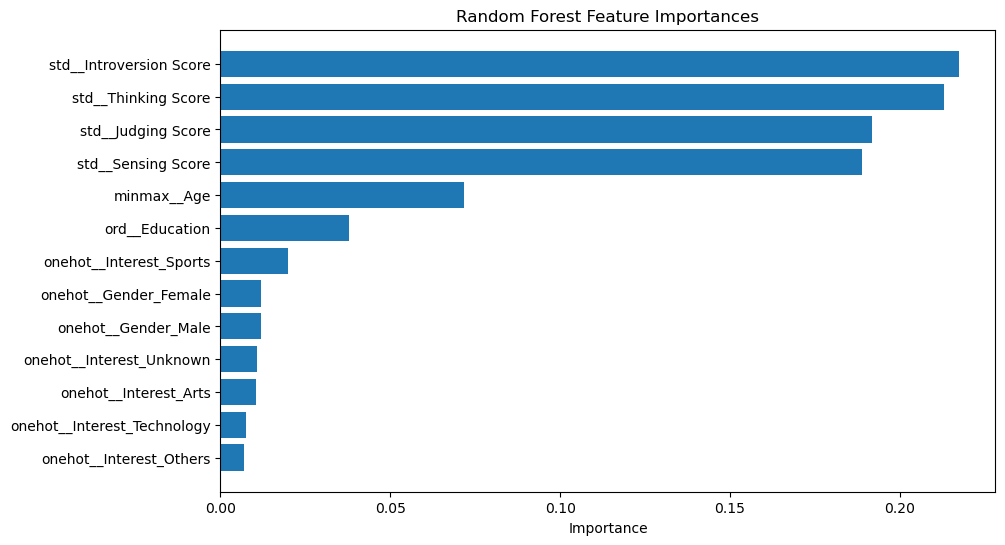

In [10]:
rf_model = best_model.named_steps['model']
importances = rf_model.feature_importances_

# Map the feature importances to their corresponding feature names
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()
plt.savefig("Random Forest Feature Importances.png", dpi=300, bbox_inches="tight")
plt.show()

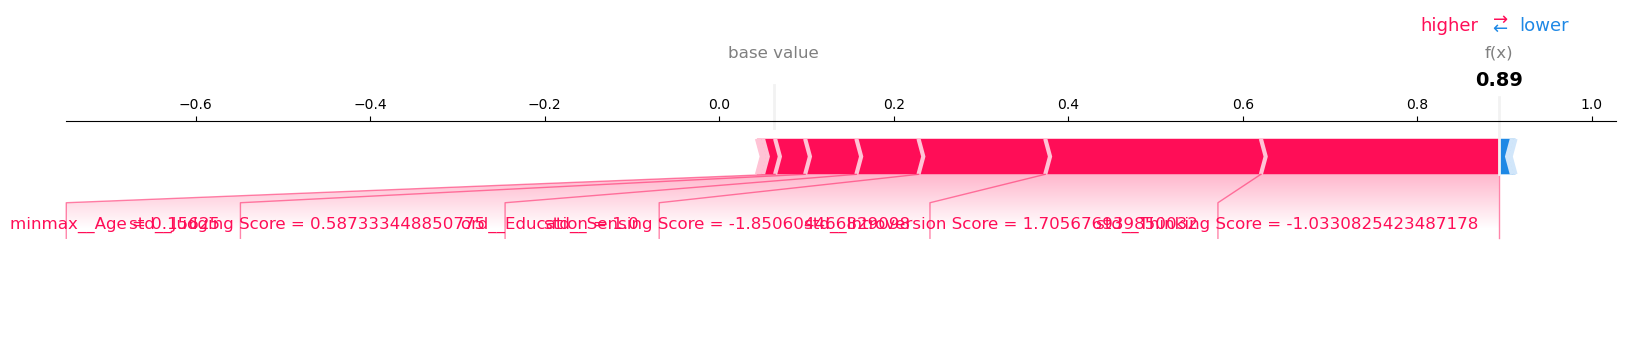

In [114]:
index = 0  # Index of the sample to plot
shap_value = shap_values[index, :, 1]  # Select the correct SHAP value

# Generate the force plot
force_plot = shap.force_plot(
    explainer.expected_value[1],
    shap_value,
    X_test_transformed[index, :],
    feature_names=feature_names,
    matplotlib=True)

# Save the plot
plt.show()

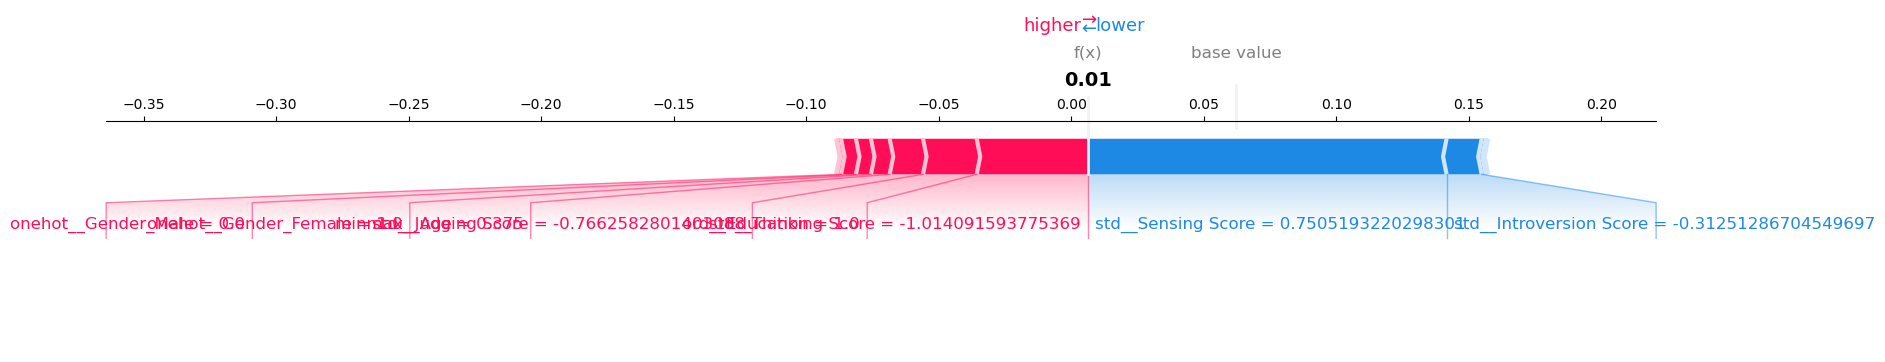

<Figure size 640x480 with 0 Axes>

In [126]:
index = 1  # Index of the sample to plot
shap_value = shap_values[index, :, 5]  # Select the correct SHAP value

# Generate the force plot
force_plot = shap.force_plot(
    explainer.expected_value[3],
    shap_value,
    X_test_transformed[index, :],
    feature_names=feature_names,
    matplotlib=True)

# Save the plot
plt.savefig("shap_force_plot.png", dpi=300, bbox_inches="tight")
plt.show()


In [12]:
index = 0  # Index of the sample to plot
shap_value = shap_values[index, :, 5]  # Select the correct SHAP value

# Generate the force plot
force_plot = shap.force_plot(
    explainer.expected_value[3],
    shap_value,
    X_test_transformed[index, :],
    feature_names=feature_names)

shap.save_html("shap_force_plot2.html", force_plot)


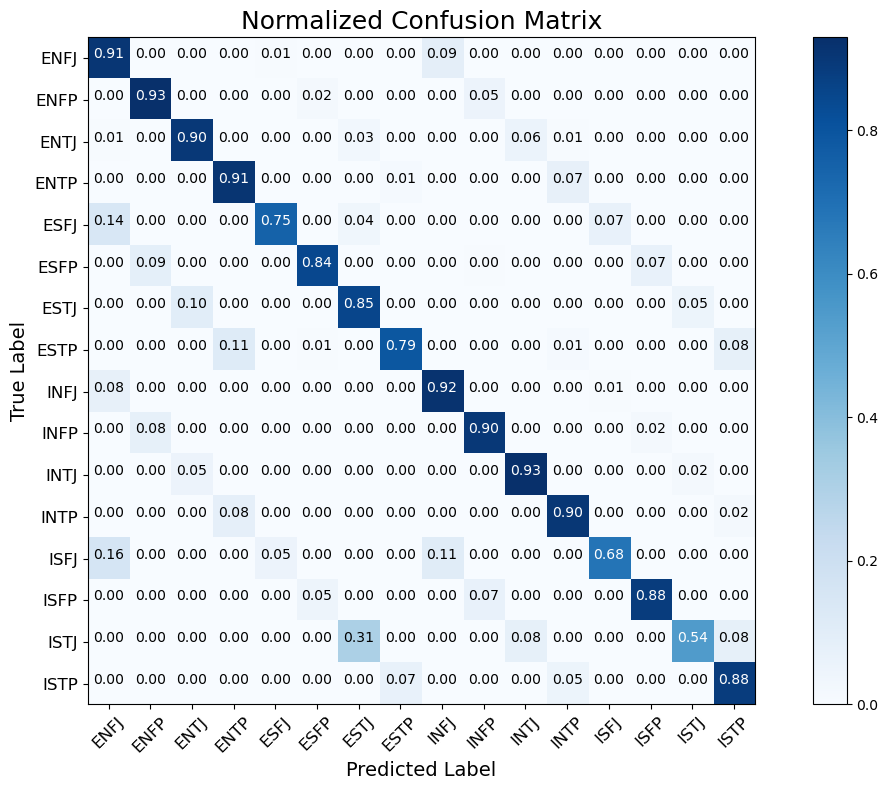

In [60]:
# Ensure consistent data types
y_test_decoded = label_encoder.inverse_transform(y_test)
y_test_pred_decoded = label_encoder.inverse_transform(y_test_pred)

# Compute confusion matrix
cm = confusion_matrix(y_test_decoded, y_test_pred_decoded, labels=label_encoder.classes_)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Normalized Confusion Matrix", fontsize=18)
plt.colorbar()

tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45, fontsize=12)
plt.yticks(tick_marks, label_encoder.classes_, fontsize=12)

for i, j in np.ndindex(cm_normalized.shape):
    plt.text(j, i, f"{cm_normalized[i, j]:.2f}", horizontalalignment="center",
             color="white" if cm_normalized[i, j] > 0.5 else "black", fontsize=10)

plt.ylabel("True Label", fontsize=14)
plt.xlabel("Predicted Label", fontsize=14)
plt.tight_layout()
plt.savefig("normalized_confusion_matrix_fixed.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
import shap
import matplotlib.pyplot as plt

# Generate the SHAP summary plot
shap.summary_plot(
    shap_values[:, :, 1],
    X_test_transformed[:1000],
    feature_names=feature_names
)

# Save the plot to a file
plt.savefig("shap_summary_plot.png", dpi=300, bbox_inches="tight")
plt.show()


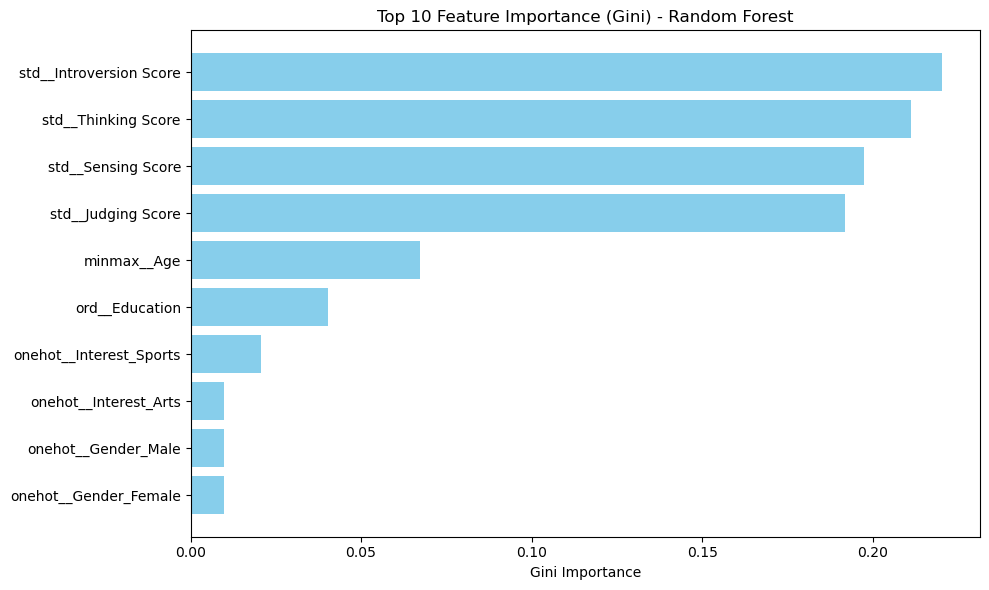

In [16]:
# Extract the trained Random Forest model from the pipeline
rf_model = best_model.named_steps['model']

# Get Gini importance from the Random Forest model
gini_importance = rf_model.feature_importances_

# Sort features by their importance
sorted_idx = gini_importance.argsort()[-10:]  # Select the top 10 features

# Plot Gini importance for top 10 features
plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_idx], gini_importance[sorted_idx], color='skyblue')
plt.xlabel("Gini Importance")
plt.title("Top 10 Feature Importance (Gini) - Random Forest")
plt.tight_layout()
plt.savefig("top_10_gini_importance_rf.png", dpi=300, bbox_inches="tight")
plt.show()


Test F1 Macro Score (Baseline): 0.844385533896994
Shuffling feature: ord__Education
   Shuffled test score: 0.649 +/- 0.010
Shuffling feature: onehot__Gender_Female
   Shuffled test score: 0.817 +/- 0.005
Shuffling feature: onehot__Gender_Male
   Shuffled test score: 0.825 +/- 0.006
Shuffling feature: onehot__Interest_Arts
   Shuffled test score: 0.832 +/- 0.005
Shuffling feature: onehot__Interest_Sports
   Shuffled test score: 0.792 +/- 0.004
Shuffling feature: minmax__Age
   Shuffled test score: 0.717 +/- 0.012
Shuffling feature: std__Introversion Score
   Shuffled test score: 0.459 +/- 0.013
Shuffling feature: std__Sensing Score
   Shuffled test score: 0.475 +/- 0.008
Shuffling feature: std__Thinking Score
   Shuffled test score: 0.432 +/- 0.016
Shuffling feature: std__Judging Score
   Shuffled test score: 0.479 +/- 0.010


/var/folders/9w/j207dmhx2hj6mv2hflhg8zfm0000gn/T/ipykernel_47472/2781246645.py:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


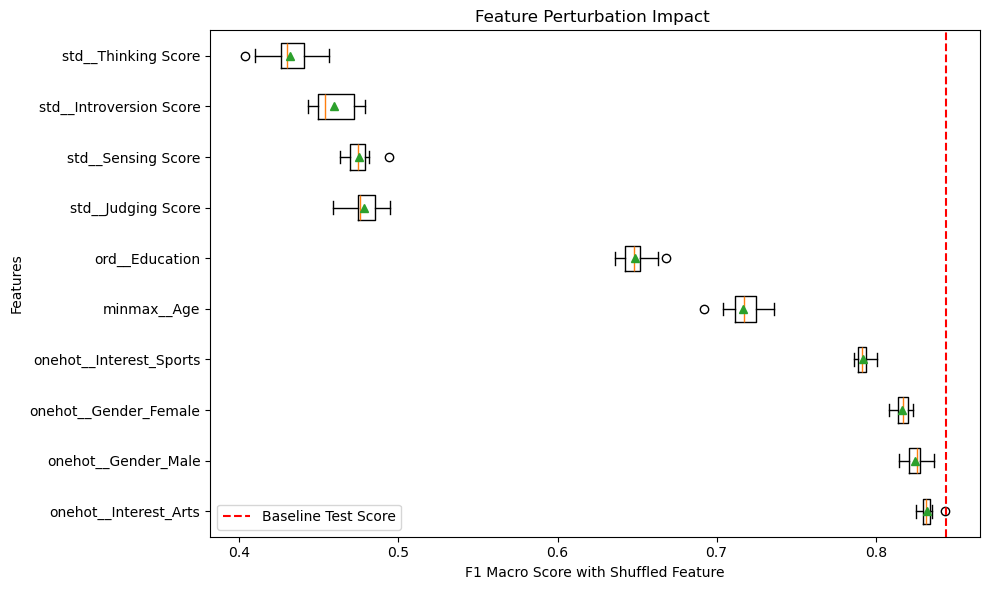

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(5)

# Define parameters
nr_runs = 10
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

# Exclude 'onehot__Interest_Unknown', 'onehot__Interest_Others', and 'onehot__Interest_Technology' from analysis
excluded_features = ['onehot__Interest_Unknown', 'onehot__Interest_Others', 'onehot__Interest_Technology']
included_features = [feature for feature in feature_names if feature not in excluded_features]

# Ensure 'std__Thinking Score' is included
if 'std__Thinking Score' not in included_features:
    included_features.append('std__Thinking Score')

scores = np.zeros((len(included_features), nr_runs))

# Get test score
test_score = f1_score(y_test, best_model.predict(X_test), average='macro')
print("Test F1 Macro Score (Baseline):", test_score)

# Feature perturbation analysis
for i, feature in enumerate(included_features):
    print(f"Shuffling feature: {feature}")
    acc_scores = []
    for _ in range(nr_runs):
        X_test_transformed = best_model.named_steps['preprocessor'].transform(X_test)
        X_test_shuffled = X_test_transformed.copy()
        np.random.shuffle(X_test_shuffled[:, feature_names.tolist().index(feature)])  # Shuffle the column for the specific feature
        acc_scores.append(
            f1_score(
                y_test,
                best_model.named_steps['model'].predict(X_test_shuffled),
                average='macro'
            )
        )
    print(f"   Shuffled test score: {np.mean(acc_scores):.3f} +/- {np.std(acc_scores):.3f}")
    scores[i] = acc_scores

# Sort features by their impact
sorted_indices = np.argsort(np.mean(scores, axis=1))[::-1]

# Select top 10 features
top_n = 10  # Adjust as needed
top_indices = sorted_indices[:top_n]

# Plot feature perturbation impact for top features
plt.figure(figsize=(10, 6))
plt.boxplot(
    scores[top_indices].T,
    vert=False,
    labels=np.array(included_features)[top_indices],
    showmeans=True
)
plt.axvline(test_score, color='red', linestyle='--', label='Baseline Test Score')
plt.xlabel("F1 Macro Score with Shuffled Feature")
plt.ylabel("Features")
plt.title("Feature Perturbation Impact ")
plt.legend()
plt.tight_layout()
plt.savefig("Feature_Perturbation.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example Data
baseline_f1 = 0.026
model_names = ['Random Forest', 'SVM', 'Xgboost', 'LogisticReg', 'DecisionTree']
mean_scores = [0.866, 0.774, 0.858, 0.685, 0.827]  # Replace with actual means
std_scores = [0.007, 0.004, 0.005, 0.006, 0.008]  # Replace with actual stds

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, mean_scores, yerr=std_scores, capsize=5, alpha=0.7, color='skyblue', edgecolor='black')

# Add baseline dashed line
plt.axhline(y=baseline_f1, color='red', linestyle='--', linewidth=1, label=f'Baseline (F1={baseline_f1})')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Macro F1-score')
plt.title('Model Performance')
plt.ylim(0, 1)
plt.legend()

# Display the plot
plt.savefig('model_performance_bar_with_baseline.png', dpi=300, bbox_inches='tight')  # Save if needed
plt.show()
